# Paramètres de l'expérience

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### >>> lndiquer ici l'URL de la matrice

In [2]:
matrix_url = "http://www.cise.ufl.edu/research/sparse/mat/HB/gre_115.mat"

In [3]:
from Parameters import *
algorithm_parameters = Parameters()

### >>> Indiquer ici la tolérance de GMRES

In [4]:
algorithm_parameters["tol"] = 1.e-10

### >>> Indiquer ici le préconditionneur à utiliser

In [5]:
from scipy.sparse.linalg import spilu
# Le préconditionneur doit être présenté sous la forme
# d'une fonction de la matrice à préconditionner
# mettre None pour GMRES sans préconditionneur :
# algorithm_parameters["precond"] = None

tau=1.e-1
n=115
algorithm_parameters["precond"] = lambda A: spilu(A, drop_tol=tau, fill_factor=n)

### >>> Indiquer ici de quel coté le préconditionneur est appliqué

In [6]:
# True : left preconditioner, False : right preconditioner
algorithm_parameters["left"] = False 
# algorithm_parameters["left"] = True 

In [7]:
from Resilience import *

# Lancement de l'experience

In [8]:
# 0 < step < 64, nombre de points (experience) par axe
# 1 = tres rapide à calculer
# 64 = tres lent à calculer
# (Au total, environ step*step experiences sont lancées)
step = 5

Loading the matrix... 
Downloading: gre_115.mat Bytes: 1711
      1711  [100.00%]

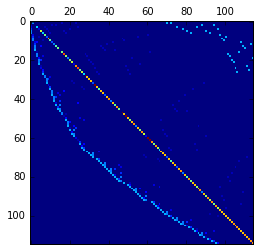

 Running the reference experiment (no fault) ...
Complete ! 


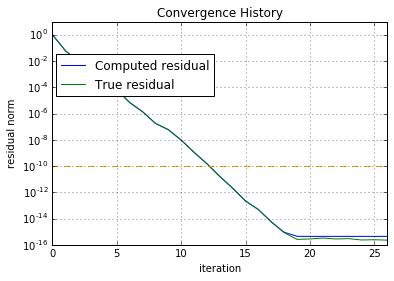

Running the full experiment...
Complete ! 


In [9]:
E = run(algorithm_parameters, matrix_url=matrix_url, step = step)

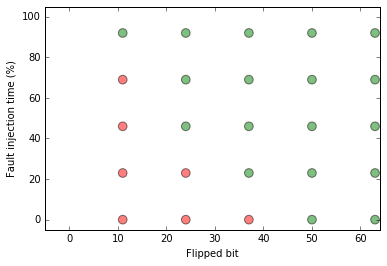

In [10]:
convergence_results(E)

### >>> Choix du paramètre c (par défault, c = 0.5)

In [11]:
c = 0.5

Executions qui ont convergée sans delai


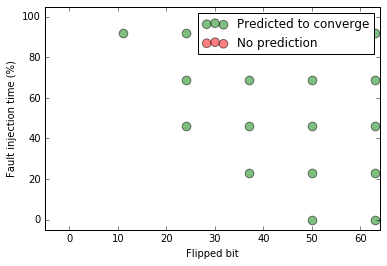

Executions qui ont convergée avec delai


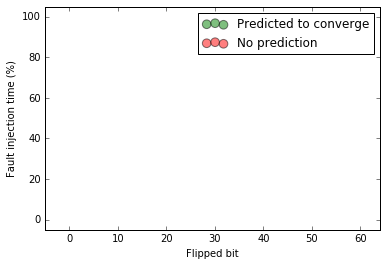

Executions qui n'ont pas convergée


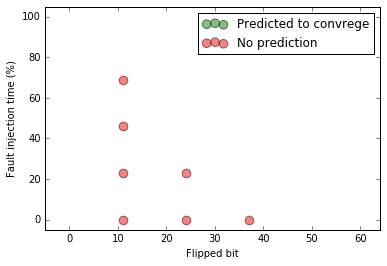

In [12]:
prediction_result(E, c=c, epsilon = algorithm_parameters["tol"])

### >>> Choix des heuristiques pour la détection

In [13]:
# Par défault : key_checksum = "checksum" 
#               key_threshold = "computed_threshold" ((c * epsilon) / y_{k, k})
# Sinon :       key_checksum = "true_checksum" (||w - w~||)
#               key_threshold = "threshold" ((c * epsilon) / y_{l, k})
key_checksum = "checksum" # or "true_checksum"
key_threshold = "computed_threshold" # or "threshold" 

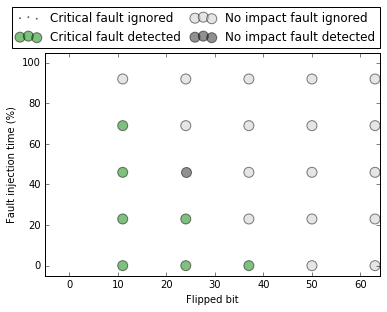

In [14]:
detection_results(E, key_checksum=key_checksum, 
                     key_threshold=key_threshold, 
                     c=c, 
                     epsilon = algorithm_parameters["tol"])

### Pour visualiser une execution, utiliser la cellule suivante :

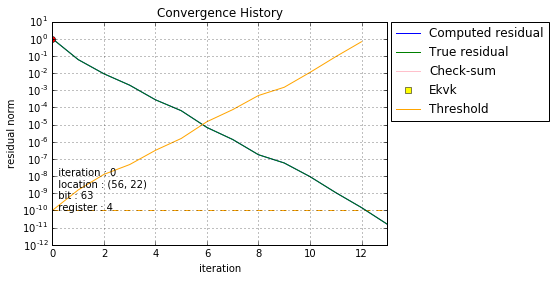

In [15]:
# Pour connaitre l'id de l'execution
# Elles sont numérotées de cette manière dans la figure ci-dessus (step = 5):
# 24  19  14  9  4
# 23  18  13  8  3
# 22  17  12  7  2
# 21  16  11  6  1
# 20  15  10  5  0
id_execution = 0

plt.plot([0, E.min_iteration], [algorithm_parameters["tol"], algorithm_parameters["tol"]], linestyle="--", color="orange")
gmres_display.convergence_history(E.get_data()[id_execution], xlim = (0, E.min_iteration), ylim = (algorithm_parameters["tol"] / 100, 10), 
                                      computed_residual = True, true_residual = True, 
                                      checksum = True, Ekvk = True,
                                      computed_threshold = False, threshold = True,
                                      delta = False, true_delta = False,
                                      c = 1,  fault = True,
                                      bbox_to_anchor = (1.5, 1.025), xytext=(0, algorithm_parameters["tol"]))

try:
    plt.show()
except:
    pass